# Cardiovascular : Analytical

In [1]:
import pandas as pd

import seaborn as sb
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.style.use('ggplot')

<Figure size 1000x800 with 0 Axes>

In [2]:
file = 'CVD_cleaned.csv'

In [3]:
df = pd.read_csv(file)
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

From information above we know that most of columns are categorical. And there is no indicate for null value

In [5]:
df.describe()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000
mean,170.615249,83.588655,28.626211,5.096366,29.835200,15.110441,6.296616
std,10.658026,21.343210,6.522323,8.199763,24.875735,14.926238,8.582954
min,91.000000,24.950000,12.020000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,24.210000,0.000000,12.000000,4.000000,2.000000
50%,170.000000,81.650000,27.440000,1.000000,30.000000,12.000000,4.000000
75%,178.000000,95.250000,31.850000,6.000000,30.000000,20.000000,8.000000
max,241.000000,293.020000,99.330000,30.000000,120.000000,128.000000,128.000000


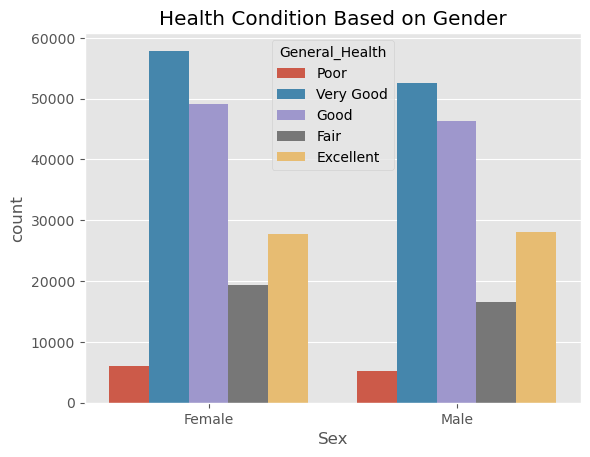

In [6]:
# Lets Start From basic, to show how are health condition based on gender

sb.countplot(data = df,hue=df.General_Health,x=df.Sex)
plt.title('Health Condition Based on Gender')
plt.show()


In [7]:
df.Diabetes.unique()

array(['No', 'Yes', 'No, pre-diabetes or borderline diabetes',
       'Yes, but female told only during pregnancy'], dtype=object)

Apparently there is another category beside Yes/No. Pre-diabetes can be included as No, but Pregnancy Diabetes also called gestational diabetes

In [8]:
#Use Copy of main dataframe

df2 = df.copy()

df2.loc[df['Diabetes'] == 'No, pre-diabetes or borderline diabetes','Diabetes'] = 'No'
df2.loc[df['Diabetes'] == 'Yes, but female told only during pregnancy','Diabetes'] = 'Gestational'

df2.Diabetes.unique()

array(['No', 'Yes', 'Gestational'], dtype=object)

<Figure size 1800x2000 with 0 Axes>

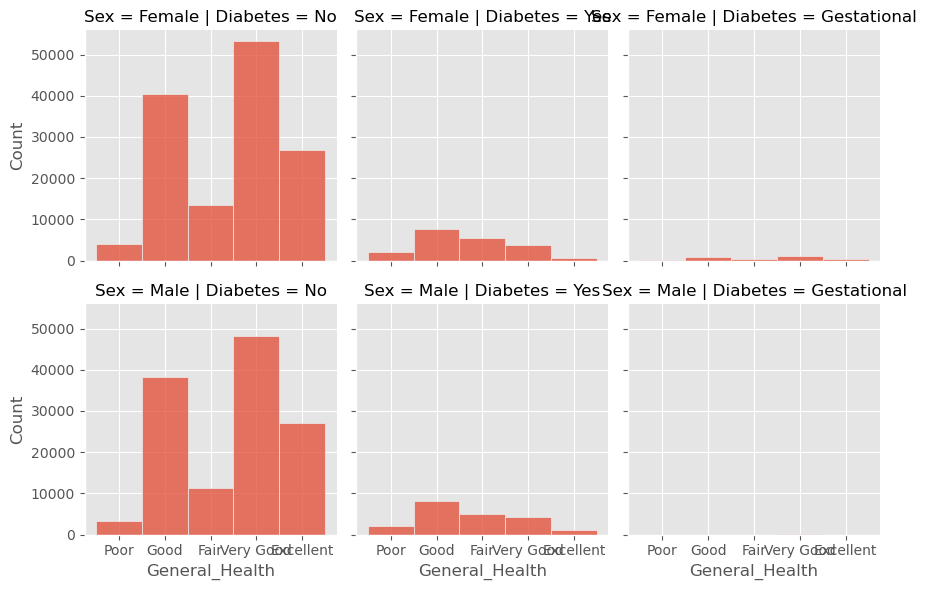

In [9]:
plt.figure(figsize=(18,20))
gender_based = sb.FacetGrid(df2,col='Diabetes',row='Sex')
gender_based.map(sb.histplot,'General_Health')
plt.show()

In [10]:
#Checks for another columns
featured = df2.select_dtypes(include=['object']).columns



for cols in featured:
    print(df2[cols].unique())

['Poor' 'Very Good' 'Good' 'Fair' 'Excellent']
['Within the past 2 years' 'Within the past year' '5 or more years ago'
 'Within the past 5 years' 'Never']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes' 'Gestational']
['Yes' 'No']
['Female' 'Male']
['70-74' '60-64' '75-79' '80+' '65-69' '50-54' '45-49' '18-24' '30-34'
 '55-59' '35-39' '40-44' '25-29']
['Yes' 'No']


In [11]:
#Since everything looks good, lets start encoding
from sklearn.preprocessing import LabelEncoder

In [12]:
for cols in featured:
    encoder = LabelEncoder()
    encoded_labels = encoder.fit_transform(df2[cols])
    
    df2[cols] = encoded_labels
    
df2

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,3,2,0,0,0,0,0,1,1,0,10,150.0,32.66,14.54,1,0.0,30.0,16.0,12.0
1,4,4,0,1,0,0,0,2,0,0,10,165.0,77.11,28.29,0,0.0,30.0,0.0,4.0
2,4,4,1,0,0,0,0,2,0,0,8,163.0,88.45,33.47,0,4.0,12.0,3.0,16.0
3,3,4,1,1,0,0,0,2,0,1,11,180.0,93.44,28.73,0,0.0,30.0,30.0,8.0
4,2,4,0,0,0,0,0,1,0,1,12,191.0,88.45,24.37,1,0.0,8.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,4,4,1,0,0,0,0,1,0,1,1,168.0,81.65,29.05,0,4.0,30.0,8.0,0.0
308850,1,3,1,0,0,0,0,2,0,1,9,180.0,69.85,21.48,0,8.0,15.0,60.0,4.0
308851,4,0,1,0,0,0,1,0,0,0,2,157.0,61.23,24.69,1,4.0,40.0,8.0,4.0
308852,4,4,1,0,0,0,0,1,0,1,9,183.0,79.38,23.73,0,3.0,30.0,12.0,0.0


Lets do some scenarios here:
- Since BMI is representing both Height and weight, lets try scenarios with both deleted columns and not
- What's the label or goal of the prediction? Lets try General Health as target and later make a new label (Cluster) 

In [13]:
#Scene 1-GH

label = df2.General_Health
df2 =  df2.drop(columns=['General_Health','Weight_(kg)','Height_(cm)'],axis=1)

In [14]:
df2.columns

Index(['Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer', 'Other_Cancer',
       'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Age_Category', 'BMI',
       'Smoking_History', 'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption'],
      dtype='object')

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train,X_test,y_train,y_test = train_test_split(df2,label,test_size=0.25,random_state=42)

In [18]:
y_train

215065    3
149191    4
178752    0
200460    0
9652      4
         ..
119879    0
259178    2
131932    1
146867    2
121958    4
Name: General_Health, Length: 231640, dtype: int32

In [19]:
#Lets try random Forest as classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [26]:
classifier = RandomForestClassifier(n_estimators=163,random_state=42,max_depth=6)

classifier.fit(X_train,y_train)

y_pred=classifier.predict(X_test)

In [27]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.42


What a Shit Accuracy

In [23]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [24]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000263166E04C0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000026316CA73A0>})

In [25]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 9, 'n_estimators': 163}


Random Forest Seem can't predict well

In [ ]:
# Lets try SVM

from sklearn.svm import SVC

In [28]:
classifier = SVC(random_state=42,kernel='linear',C=1.0)

classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)